In [139]:
import pandas as pd
import matplotlib.pyplot  as plt

abitur = pd.read_csv('abitur.csv', sep=';',encoding='windows-1252', on_bad_lines='skip', header=0)


abitur_2011 = abitur[abitur['Jahr'] == '2011']
abitur_2011 = abitur_2011.drop(['Durchschnitt', 'Jahr'], axis=1)
print(abitur_2011)

   Note 1.0  Note 1.1  Note 1.2  Note 1.3  Note 1.4  Note 1.5  Note 1.6  \
0      88.0      53.0      74.0      96.0     124.0     192.0     199.0   

   Note 1.7  Note 1.8  Note 1.9  ...  Note 3.2  Note 3.3  Note 3.4  Note 3.5  \
0     254.0     242.0     326.0  ...     387.0     303.0     232.0     143.0   

   Note 3.6  Note 3.7  Note 3.8  Note 3.9  Note 4.0  Nicht bestanden  
0      78.0      36.0      14.0       2.0       0.0            266.0  

[1 rows x 32 columns]


Index(['Nicht', '4.0', '3.9', '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2',
       '3.1', '3.0', '2.9', '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2',
       '2.1', '2.0', '1.9', '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2',
       '1.1', '1.0'],
      dtype='object')


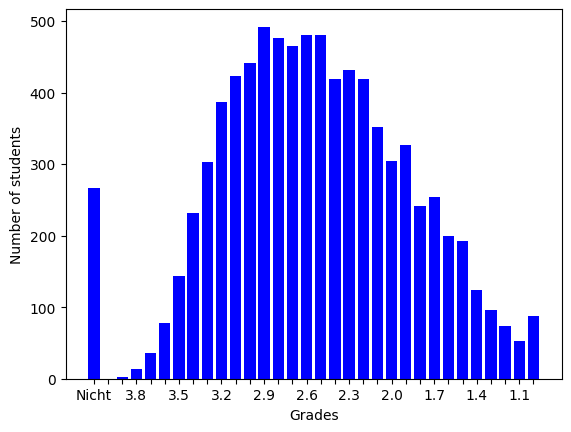

In [197]:
# Load the abitur dataset and visualize the distribution of abitur grades in Schleswig-Holstein 2021 as a
# bar chart.
# with default colors.

abitur_2011 = abitur_2011.rename(columns={'Nicht bestanden': '     Nicht'}) #reformat columm name
labels = abitur_2011.columns[::-1].str[5:]
print(labels)
fig, ax = plt.subplots()


values = abitur_2011.iloc[0].astype(float)[::-1] 
plt.xticks(ticks=range(len(labels)), 
           labels=[labels[i] if i % 3 == 0 else '' for i in range(len(labels))]) #to print every 3nd


plt.bar(labels, values, color='blue')
plt.xlabel('Grades')
plt.ylabel('Number of students')
plt.show()

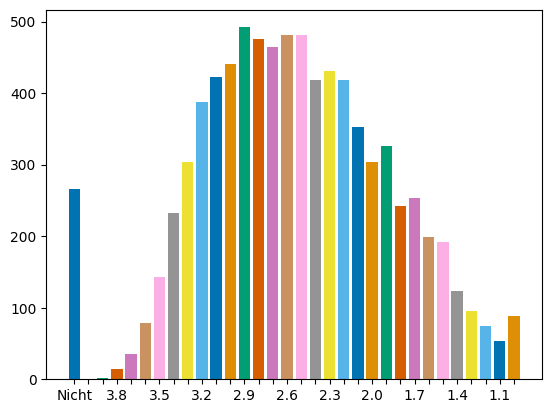

In [196]:
# Use color brewer to select a color palette. Test it for color vision deficiency and include it in
# matplotlib (or your favorite plot library)

import seaborn as sns  
palette= sns.color_palette("colorblind", n_colors=len(labels))

plt.xticks(ticks=range(len(labels)), 
           labels=[labels[i] if i % 3 == 0 else '' for i in range(len(labels))]) #to print every 3nd

plt.bar(labels, values, color=palette)
plt.xlabel('Grades')
plt.ylabel('Number of students')
plt.show()  


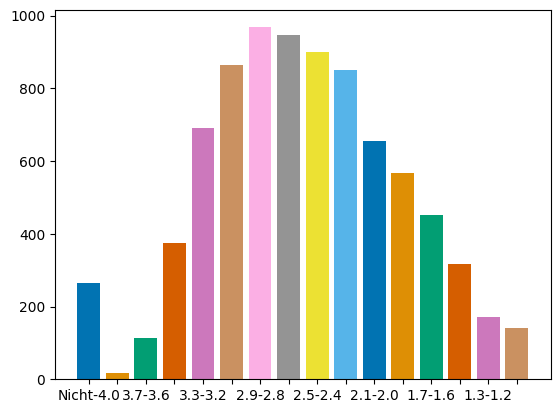

In [195]:
# Reduce the number of bins by aggregating over grade ranges by a factor of 2

aggregated_labels = [f"{labels[i]}-{labels[i+1]}" for i in range(0, len(labels), 2)]
aggregated_values = [sum(values[i:i+2]) for i in range(0, len(values), 2)]



plt.bar(aggregated_labels, aggregated_values, color=palette)
plt.xticks(ticks=range(len(aggregated_labels)), 
           labels=[aggregated_labels[i] if i % 2 == 0 else '' for i in range(len(aggregated_labels))]) #to print every 2nd
plt.xlabel('Grades')
plt.ylabel('Number of students')
plt.show()

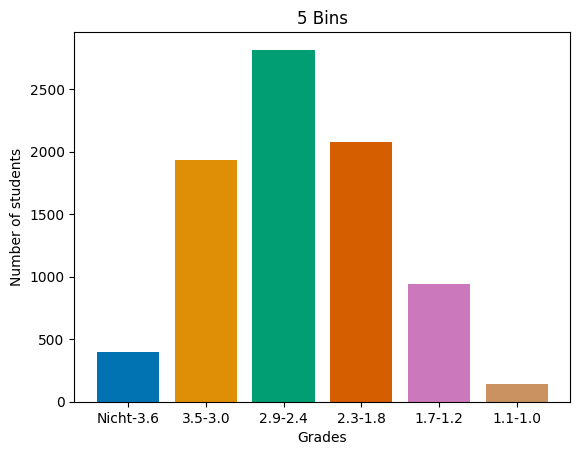

In [199]:
# Reduce the number of bins to 5

num_bins = 5

# Calculate the bin size
bin_size = len(labels) // num_bins

# Aggregate categories and values into 5 bins
aggregated_labels = [
    f"{labels[i]}-{labels[min(i + bin_size - 1, len(labels) - 1)]}"
    for i in range(0, len(labels), bin_size)
]
aggregated_values = [
    sum(values[i:min(i + bin_size, len(values))]) for i in range(0, len(values), bin_size)
]

# Choose a ColorBrewer palette
palette = sns.color_palette("colorblind", n_colors=len(aggregated_labels))

# Plot the aggregated bar chart
plt.bar(aggregated_labels, aggregated_values, color=palette)

# Add labels and title
plt.xlabel('Grades')
plt.ylabel('Number of students')
plt.title('5 Bins')

# Show the plot
plt.show()